## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## EDA and Feature Engineering

<AxesSubplot:>

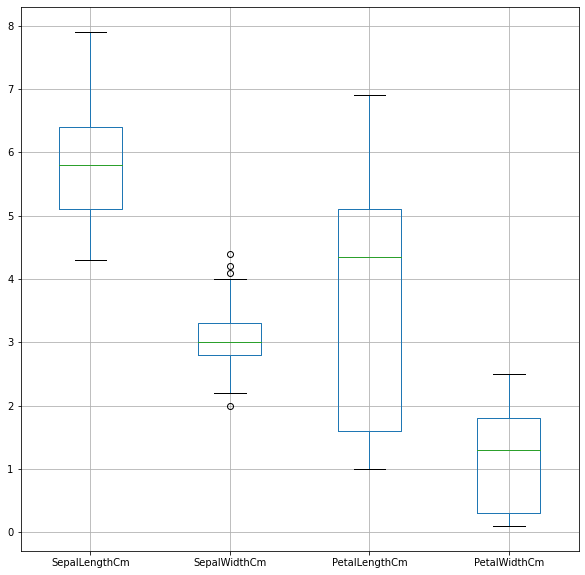

In [8]:
plt.figure(figsize=(10,10))
df1 = df.drop('Id',axis=1) 
df1.boxplot()

In [9]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df1['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [11]:
df1['Species'].value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

<AxesSubplot:ylabel='Species'>

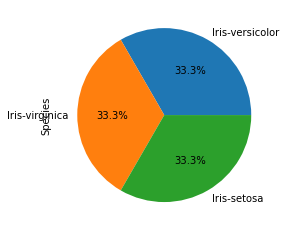

In [15]:
df1['Species'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

In [17]:
df1.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df1['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Train Test Split

In [23]:
x = df1.drop('Species',axis=1)
y = df1['Species']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=1)

In [25]:
x_train.shape

(120, 4)

In [26]:
x_test.shape

(30, 4)

## Model Training

In [28]:
lr_clf = LogisticRegression(multi_class='ovr')
lr_clf.fit(x_train,y_train)


LogisticRegression(multi_class='ovr')

## Evaluation

In [29]:
y_pred = lr_clf.predict(x_test)
y_pred[10:15]

array([1, 0, 2, 1, 1], dtype=int64)

In [30]:
y_test[10:15]

94     1
5      0
102    2
51     1
78     1
Name: Species, dtype: int64

In [37]:
# Accuracy on Testing dataset

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is :\n',cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification Report is :\n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print('Multilabel Confusion Matrix is :\n',multilabel_cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is :\n',accuracy)

Confusion Matrix is :
 [[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30

Multilabel Confusion Matrix is :
 [[[19  0]
  [ 0 11]]

 [[17  0]
  [ 4  9]]

 [[20  4]
  [ 0  6]]]
Accuracy is :
 0.8666666666666667


In [38]:
# Accuracy on Training dataset

y_pred_train = lr_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix is :\n',cnf_matrix)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report is :\n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print('Multilabel Confusion Matrix is :\n',multilabel_cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy is :\n',accuracy)

Confusion Matrix is :
 [[39  0  0]
 [ 0 33  4]
 [ 0  1 43]]
Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.89      0.93        37
           2       0.91      0.98      0.95        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Multilabel Confusion Matrix is :
 [[[81  0]
  [ 0 39]]

 [[82  1]
  [ 4 33]]

 [[72  4]
  [ 1 43]]]
Accuracy is :
 0.9583333333333334


In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
list1=list(range(0,15,1))
list1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [44]:
lr_model = LogisticRegression()
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],'multi_class' : ['auto', 'ovr', 'multinomial'],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'random_state':list1}
gscv_model = GridSearchCV(lr_model, param_grid, cv=5)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

LogisticRegression(random_state=0, solver='sag')

In [45]:
gscv_model.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}

In [46]:
# Accuracy on Testing dataset

y_pred = gscv_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is :\n',cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification Report is :\n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print('Multilabel Confusion Matrix is :\n',multilabel_cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is :\n',accuracy)

Confusion Matrix is :
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Multilabel Confusion Matrix is :
 [[[19  0]
  [ 0 11]]

 [[17  0]
  [ 1 12]]

 [[23  1]
  [ 0  6]]]
Accuracy is :
 0.9666666666666667
